In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("LanguageDetection22.csv")

In [16]:
data['language']

0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
21995      French
21996        Thai
21997     Spanish
21998     Chinese
21999    Romanian
Name: language, Length: 22000, dtype: object

In [4]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [5]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [6]:
data["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

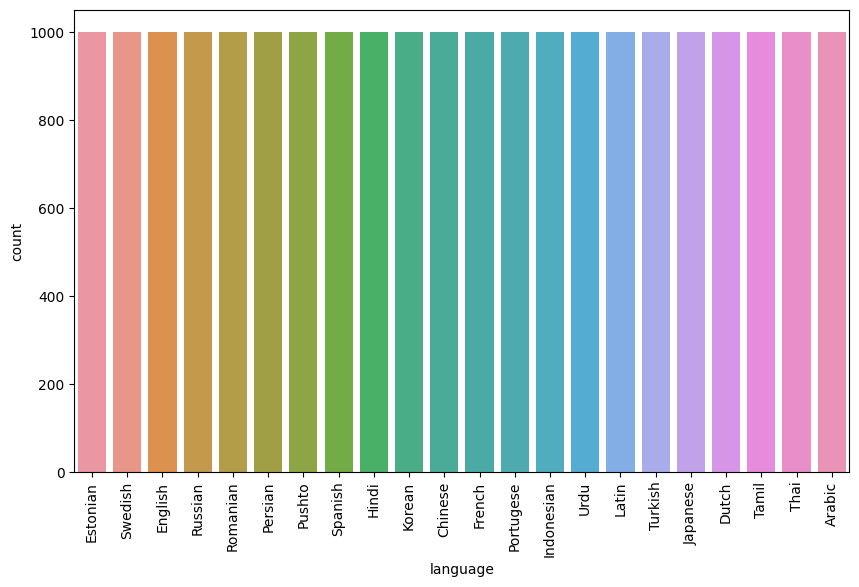

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="language", order= data["language"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [8]:
x = np.array(data["Text"])
y = np.array(data["language"])

cv = CountVectorizer()
X = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [9]:
x[29]

'آهن ترکیباتی را ایجاد می\u200cکند که عمدتاً در حالت\u200cهای اکسیداسیون  و  هستند به\u200cطور سنتی ترکیبات آهن ii فروس نامیده می\u200cشوند و ترکیبات آهن iii فریک نامیده می\u200cشود ترکیبات زیادی در هر یک از حالات اکسیداسیون وجود دارد که مثال\u200cهایی از آن شامل سولفات آهن ii feso و کلرید آهن iii fecl می\u200cباشد'

In [10]:
y

array(['Estonian', 'Swedish', 'Thai', ..., 'Spanish', 'Chinese',
       'Romanian'], dtype=object)

In [ ]:
# text2 = ["Morteza Alizadeh Come Come To Machine Machine", "Alizadeh Come To Machine", "Come To Machine"]
# vectorizer = CountVectorizer()
# Y = vectorizer.fit_transform(text2)

# print(Y.toarray())

In [11]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [12]:
model.score(X_test,y_test)

0.953168044077135

In [13]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: اسم من مرتضی است
['Persian']


In [ ]:
# from langdetect import detect

In [ ]:
# text = input ("Enter any text in any language: ")
# print(detect(text))